## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "./Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='left')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [107]:
# Checking the number of unique mice.
mice_mumber = len(combined_df['Mouse ID'].unique())
print(f'There are {mice_mumber} unique mice in the study')

There are 249 unique mice in the study


In [108]:
# number of all data points in the combined raw DataFrame
combined_df['Mouse ID'].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_values = combined_df[duplicates]
duplicated_values

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df_1 = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False, ignore_index=True)
# check the number of remaining data points after dropping duplicated values
len(clean_df_1)

1888

In [7]:
# instead of dropping the duplicates and therefore losing the some Tumor Volume Data Points, I want to keep all the Data Points by averaging them for duplicate values

grouped = combined_df.groupby(['Mouse ID', 'Drug Regimen', 'Sex', 'Timepoint'])
Age_months = grouped[['Age_months']].mean()
Age_months['Weight (g)'] = grouped[['Weight (g)']].mean()
Age_months['Metastatic Sites'] = grouped[['Metastatic Sites']].mean()
Age_months['Tumor Volume (mm3)'] = grouped[['Tumor Volume (mm3)']].mean()
Age_months = Age_months.reset_index()
clean_df_2 = Age_months
clean_df_2

,Mouse ID,Drug Regimen,Sex,Timepoint,Age_months,Weight (g),Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,0,20,23,0.0,45.000000
1,a203,Infubinol,Female,5,20,23,0.0,48.508468
2,a203,Infubinol,Female,10,20,23,1.0,51.852437
3,a203,Infubinol,Female,15,20,23,1.0,52.777870
4,a203,Infubinol,Female,20,20,23,1.0,55.173336
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,25,9,30,2.0,63.145652
1884,z969,Naftisol,Male,30,9,30,3.0,65.841013
1885,z969,Naftisol,Male,35,9,30,4.0,69.176246
1886,z969,Naftisol,Male,40,9,30,4.0,70.314904


In [8]:
# same as previous cell (keeping duplicate values by averaging them). This time the date is put together by using groupby aggregate function
# Moving forward I will use data calculated in this cell. Which is defined as clean_df variable
grouped = combined_df.groupby(['Mouse ID', 'Drug Regimen', 'Sex', 'Timepoint'])
clean_df = grouped.agg({
    'Age_months': 'mean',
    'Weight (g)': 'mean',
    'Metastatic Sites': 'mean',
    'Tumor Volume (mm3)': 'mean'
}).reset_index()
clean_df

,Mouse ID,Drug Regimen,Sex,Timepoint,Age_months,Weight (g),Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,0,20,23,0.0,45.000000
1,a203,Infubinol,Female,5,20,23,0.0,48.508468
2,a203,Infubinol,Female,10,20,23,1.0,51.852437
3,a203,Infubinol,Female,15,20,23,1.0,52.777870
4,a203,Infubinol,Female,20,20,23,1.0,55.173336
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,25,9,30,2.0,63.145652
1884,z969,Naftisol,Male,30,9,30,3.0,65.841013
1885,z969,Naftisol,Male,35,9,30,4.0,69.176246
1886,z969,Naftisol,Male,40,9,30,4.0,70.314904


In [112]:
# Checking the number of mice in the clean DataFrame. 
mice_mumber_clean = len(clean_df['Mouse ID'].unique())
print(f'There are {mice_mumber_clean} unique mice in the clean data set')

There are 249 unique mice in the clean data set


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = clean_df.groupby(['Drug Regimen'])
tumor_volume_mean = regimen_grouped[['Tumor Volume (mm3)']].mean().rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
tumor_volume_median = regimen_grouped[['Tumor Volume (mm3)']].mean().rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})
tumor_volume_var = regimen_grouped[['Tumor Volume (mm3)']].var().rename(columns={'Tumor Volume (mm3)': 'Var Tumor Volume'})
tumor_volume_std = regimen_grouped[['Tumor Volume (mm3)']].std().rename(columns={'Tumor Volume (mm3)': 'Std Tumor Volume'})
tumor_volume_sem = regimen_grouped[['Tumor Volume (mm3)']].sem().rename(columns={'Tumor Volume (mm3)': 'SEM Tumor Volume'})
tumor_volume_count = regimen_grouped[['Tumor Volume (mm3)']].count().rename(columns={'Tumor Volume (mm3)': 'Count Tumor Volume'})
# Assemble the resulting series into a single summary dataframe.
regimen_df_1 = pd.merge(tumor_volume_mean, tumor_volume_median, on='Drug Regimen', how='inner')
regimen_df_1 = pd.merge(regimen_df_1, tumor_volume_var, on='Drug Regimen', how='inner')
regimen_df_1 = pd.merge(regimen_df_1, tumor_volume_std, on='Drug Regimen', how='inner')
regimen_df_1 = pd.merge(regimen_df_1, tumor_volume_sem, on='Drug Regimen', how='inner')
regimen_df_1 = pd.merge(regimen_df_1, tumor_volume_count, on='Drug Regimen', how='inner')
regimen_df_1

,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,Std Tumor Volume,SEM Tumor Volume,Count Tumor Volume
Drug Regimen,,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821,178
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236,178
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860,188
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466,186
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331,181
Propriva,52.388228,52.388228,43.163594,6.569901,0.526013,156
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111,181


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
regimen_df = regimen_grouped.agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem', 'count' ]
})
regimen_df


Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.388228  50.833737  43.163594  6.569901  0.526013   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       156  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

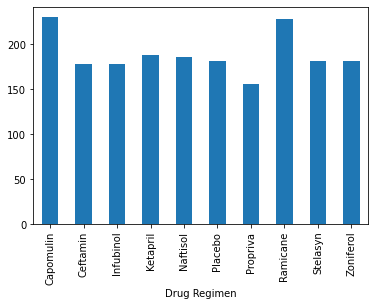

In [139]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_df.loc[:, ('Tumor Volume (mm3)', 'count')].plot(kind='bar')


Text(0.5, 0, 'Drug Regimen')

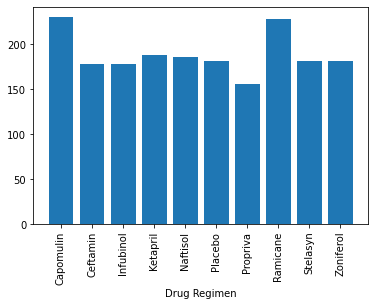

In [140]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen_df.index, regimen_df[('Tumor Volume (mm3)', 'count')])
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
# plt.figure(figsize=(15,10))

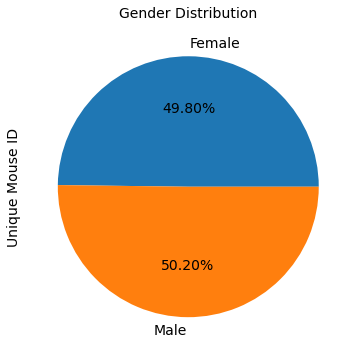

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using panda
unique_mice = clean_df.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=False, ignore_index=True)
gender = unique_mice.groupby(['Sex'])['Mouse ID'].count()
gender_plot = gender.plot(kind='pie', figsize=(6,6), autopct='%.2f%%', fontsize=14)
gender_plot.set_ylabel('Unique Mouse ID').set_fontsize(14)
gender_plot.set_title('Gender Distribution').set_fontsize(14)

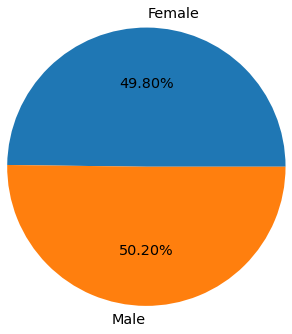

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot_2 = plt.pie(gender, autopct='%.2f%%', labels=gender.index, textprops={'size': 'x-large'}, radius=1.6)




## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint_with_clean_df = pd.merge(greatest_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left').rename(
    columns={
    "Timepoint": "Max Timepoint", 
    'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'
    })
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Dataframe four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_of_interest_finalvolume = greatest_timepoint_with_clean_df.loc[greatest_timepoint_with_clean_df['Drug Regimen'].isin(treatments_of_interest)]
treatments_of_interest_finalvolume

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites,Final Tumor Volume (mm3)
0,a203,45,Infubinol,Female,20,23,2.0,67.973419
1,a251,45,Infubinol,Female,21,25,1.0,65.525743
3,a275,45,Ceftamin,Female,20,28,3.0,62.999356
6,a411,45,Ramicane,Male,3,22,1.0,38.407618
7,a444,45,Ramicane,Female,10,25,0.0,43.047543
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,4.0,68.594745
240,y793,45,Capomulin,Male,17,17,2.0,31.896238
241,y865,45,Ceftamin,Male,23,26,3.0,64.729837
245,z578,45,Ramicane,Male,11,16,0.0,30.638696


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(treatments_of_interest_finalvolume['Drug Regimen'].unique())

# Create lists for each drug containing final tumor volume
tumor_volume_Infubinol = treatments_of_interest_finalvolume.loc[
    treatments_of_interest_finalvolume['Drug Regimen'] =='Infubinol', 
    'Final Tumor Volume (mm3)']

tumor_volume_Ceftamin = treatments_of_interest_finalvolume.loc[
    treatments_of_interest_finalvolume['Drug Regimen'] =='Ceftamin', 
    'Final Tumor Volume (mm3)']

tumor_volume_Ramicane = treatments_of_interest_finalvolume.loc[
    treatments_of_interest_finalvolume['Drug Regimen'] =='Ramicane', 
    'Final Tumor Volume (mm3)']

tumor_volume_Capomulin = treatments_of_interest_finalvolume.loc[
    treatments_of_interest_finalvolume['Drug Regimen'] =='Capomulin', 
    'Final Tumor Volume (mm3)']

# Calcualate quartiles of tumor volume for each drug
quartiles_Infubinol = tumor_volume_Infubinol.quantile([.25,.5,.75])
quartiles_Ceftamin = tumor_volume_Ceftamin.quantile([.25, .5, .75])
quartiles_Ramicane = tumor_volume_Ramicane.quantile([.25, .5, .75])
quartiles_Capomulin = tumor_volume_Capomulin.quantile([.25, .5, .75])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR_Infubinol = quartiles_Infubinol[0.75] - quartiles_Infubinol[0.25]
IQR_Ceftamin = quartiles_Ceftamin[0.75] - quartiles_Ceftamin[0.25]
IQR_Ramicane = quartiles_Ramicane[0.75] - quartiles_Ramicane[0.25]
IQR_Capomulin = quartiles_Capomulin[0.75] - quartiles_Capomulin[0.25]

# Determine if there are any potential outliers
    # Infubinol
Infubinol_lower_bound = quartiles_Infubinol[0.25] - (1.5*IQR_Infubinol)
Infubinol_upper_bound = quartiles_Infubinol[0.75] + (1.5*IQR_Infubinol)
Infubinol_outlires = pd.concat([tumor_volume_Infubinol[tumor_volume_Infubinol < Infubinol_lower_bound],
                      tumor_volume_Infubinol[tumor_volume_Infubinol > Infubinol_upper_bound]])
print(f'Infubinol treatment tumor volume potential outlires is/are the following value(s) {Infubinol_outlires.values}')   
 
    
    #Ceftamin
Ceftamin_lower_bound = quartiles_Ceftamin[0.25] - (1.5*IQR_Ceftamin)
Ceftamin_upper_bound = quartiles_Ceftamin[0.75] + (1.5*IQR_Ceftamin)
Ceftamin_outlires = pd.concat([tumor_volume_Ceftamin[tumor_volume_Ceftamin < Ceftamin_lower_bound],
                      tumor_volume_Ceftamin[tumor_volume_Ceftamin > Ceftamin_upper_bound]])
print(f'Ceftamin treatment tumor volume potential outlires is/are the following value(s) {Ceftamin_outlires.values}')   
    
    #Ramicane
Ramicane_lower_bound = quartiles_Ramicane[0.25] - (1.5*IQR_Ramicane)
Ramicane_upper_bound = quartiles_Ramicane[0.75] + (1.5*IQR_Ramicane)
Ramicane_outlires = pd.concat([tumor_volume_Ramicane[tumor_volume_Ramicane < Ramicane_lower_bound],
                      tumor_volume_Ramicane[tumor_volume_Ramicane > Ramicane_upper_bound]])
print(f'Ramicane treatment tumor volume potential outlires is/are the following value(s) {Ramicane_outlires.values}')

    #Capomulin
Capomulin_lower_bound = quartiles_Capomulin[0.25] - (1.5*IQR_Capomulin)
Capomulin_upper_bound = quartiles_Capomulin[0.75] + (1.5*IQR_Capomulin)
Capomulin_outlires = pd.concat([tumor_volume_Capomulin[tumor_volume_Capomulin < Capomulin_lower_bound],
                      tumor_volume_Capomulin[tumor_volume_Capomulin > Capomulin_upper_bound]])
print(f'Capomulin treatment tumor volume potential outlires is/are the following value(s) {Capomulin_outlires.values}')

Infubinol treatment tumor volume potential outlires is/are the following value(s) [36.3213458]
Ceftamin treatment tumor volume potential outlires is/are the following value(s) []
Ramicane treatment tumor volume potential outlires is/are the following value(s) []
Capomulin treatment tumor volume potential outlires is/are the following value(s) []


([<matplotlib.axis.XTick at 0x7fe66a274ee0>,
 [Text(1, 0, 'Infubinol'),
  Text(2, 0, 'Ceftamin'),
  Text(3, 0, 'Ramicane'),
  Text(4, 0, 'Capomulin')])

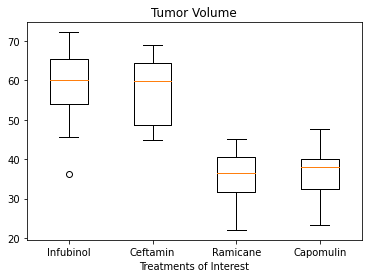

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.boxplot([tumor_volume_Infubinol, tumor_volume_Ceftamin, tumor_volume_Ramicane, tumor_volume_Capomulin])
ax1.set_xlabel('Treatments of Interest')
plt.xticks([1, 2, 3, 4], treatments)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

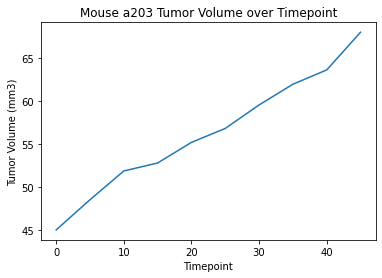

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
a203_mouse = clean_df[clean_df['Mouse ID']=='a203']
plt.plot(a203_mouse['Timepoint'], a203_mouse['Tumor Volume (mm3)'])
plt.title('Mouse a203 Tumor Volume over Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

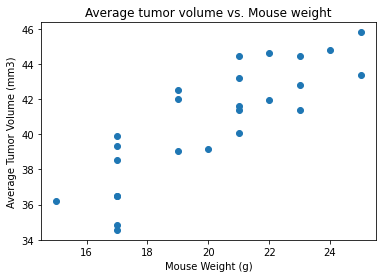

In [98]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean_df[clean_df['Drug Regimen']=='Capomulin']
Capomulin_grouped_by_mouse = Capomulin_df.groupby(['Mouse ID'])
mouseweight_avetumorvolume = Capomulin_grouped_by_mouse.agg({
    'Weight (g)': 'mean',
    'Tumor Volume (mm3)': 'mean'
})
x_weight = mouseweight_avetumorvolume['Weight (g)']
y_tumorvolume = mouseweight_avetumorvolume['Tumor Volume (mm3)']
plt.scatter(x_weight, y_tumorvolume)
plt.title('Average tumor volume vs. Mouse weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Correlation value between mouse weight and tumor volume is: 0.84


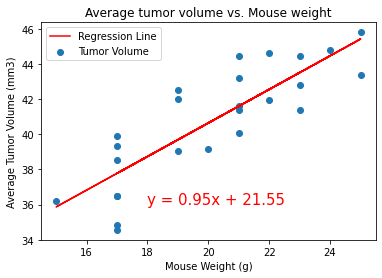

In [148]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_weight,y_tumorvolume)
tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(x_weight,y_tumorvolume)
tv_regline = tv_slope*x_weight + tv_int
print(f'Correlation value between mouse weight and tumor volume is: {round(correlation[0],2)}')
plt.scatter(x_weight, y_tumorvolume, label='Tumor Volume')
plt.title('Average tumor volume vs. Mouse weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x_weight,tv_regline, 'r-', label='Regression Line')
reg_eq = "y = " + str(round(tv_slope,2)) + "x + " + str(round(tv_int,2))
plt.annotate(reg_eq, (18,36), fontsize=15,color="red")
plt.legend(loc='best')